In [1]:
import time
start_time=time.time()

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import lmfit
from scipy import interpolate
import pickle

In [3]:
samples=pd.read_csv('CIresults//list.csv',header=None)
samples

,0
0,Dor
1,N604H
2,N595
3,N346
4,CarC
5,N604O
6,OrionLH
7,HX
8,M8
9,OrionS


In [4]:
CI = {}

for i in range(len(samples)):
    pickle_in = open('CIresults//' + samples[0][i] + '.pkl',"rb")
    df = pickle.load(pickle_in)
    CI[samples[0][i]] = df

SF = {}

for i in range(len(samples)):
    pickle_in = open('SFresults//' + samples[0][i] + '.pkl',"rb")
    df = pickle.load(pickle_in)
    SF[samples[0][i]] = df
    

Results obtained using lmfit

In [5]:
for i in range(len(samples)):
    print(str(samples[0][i]) + ':',
          ' r0 = ' + str(np.round(CI[samples[0][i]]['resultCI'].params['r0'].value,4)) + ' pc,', 
          ' m = ' + str(np.round(CI[samples[0][i]]['resultCI'].params['m'].value,4)) + ',',
          ' sig2 = ' + str(np.round(CI[samples[0][i]]['resultCI'].params['sig2'].value,4)) + ' (km/s)^2',
          ' sig = ' + str(np.round(CI[samples[0][i]]['resultCI'].params['sig2'].value**0.5,4)) + ' km/s')

Dor:  r0 = 4.3239 pc,  m = 1.1136,  sig2 = 339.8861 (km/s)^2  sig = 18.436 km/s
N604H:  r0 = 6.8998 pc,  m = 2.149,  sig2 = 43.0801 (km/s)^2  sig = 6.5635 km/s
N595:  r0 = 7.8642 pc,  m = 1.874,  sig2 = 39.623 (km/s)^2  sig = 6.2947 km/s
N346:  r0 = 1.7539 pc,  m = 1.0538,  sig2 = 38.8666 (km/s)^2  sig = 6.2343 km/s
CarC:  r0 = 0.805 pc,  m = 0.9271,  sig2 = 21.6945 (km/s)^2  sig = 4.6577 km/s
N604O:  r0 = 5.4444 pc,  m = 2.6002,  sig2 = 20.3929 (km/s)^2  sig = 4.5159 km/s
OrionLH:  r0 = 1.2745 pc,  m = 1.2062,  sig2 = 15.5652 (km/s)^2  sig = 3.9453 km/s
HX:  r0 = 3.6465 pc,  m = 1.7243,  sig2 = 12.7759 (km/s)^2  sig = 3.5743 km/s
M8:  r0 = 1.7843 pc,  m = 1.1142,  sig2 = 9.7283 (km/s)^2  sig = 3.119 km/s
OrionS:  r0 = 0.0413 pc,  m = 1.547,  sig2 = 9.3442 (km/s)^2  sig = 3.0568 km/s
HV:  r0 = 3.0002 pc,  m = 1.7429,  sig2 = 7.4871 (km/s)^2  sig = 2.7363 km/s


Results obtained using a numpy interpolation method for r0, sigma as std of the radial velocity sample and m humanly fitted.

In [6]:
for i in range(len(samples)):
    print(str(samples[0][i]) + ':',
          ' r0 = ' + str(np.round(SF[samples[0][i]]['r0'],4)) + ' pc,', 
          ' m = ' + str(np.round(SF[samples[0][i]]['m'],4)) + ',',
          ' sig2 = ' + str(np.round(SF[samples[0][i]]['sig2'],4)) + ' (km/s)^2',
          ' sig = ' + str(np.round(SF[samples[0][i]]['sig2']**0.5,4)) + ' km/s')

Dor:  r0 = 2.6956 pc,  m = 1.2,  sig2 = 252.1136 (km/s)^2  sig = 15.8781 km/s
N604H:  r0 = 8.9133 pc,  m = 1.5,  sig2 = 54.6205 (km/s)^2  sig = 7.3906 km/s
N595:  r0 = 8.7804 pc,  m = 1.5,  sig2 = 44.1279 (km/s)^2  sig = 6.6429 km/s
N346:  r0 = 1.3592 pc,  m = 1.2,  sig2 = 31.8791 (km/s)^2  sig = 5.6462 km/s
CarC:  r0 = 0.4809 pc,  m = 1.1,  sig2 = 17.8872 (km/s)^2  sig = 4.2293 km/s
N604O:  r0 = 8.1846 pc,  m = 1.5,  sig2 = 35.2995 (km/s)^2  sig = 5.9413 km/s
OrionLH:  r0 = 0.4376 pc,  m = 1.1,  sig2 = 10.4338 (km/s)^2  sig = 3.2301 km/s
HX:  r0 = 3.5817 pc,  m = 1.5,  sig2 = 12.896 (km/s)^2  sig = 3.5911 km/s
M8:  r0 = 1.0906 pc,  m = 1.3,  sig2 = 7.5264 (km/s)^2  sig = 2.7434 km/s
OrionS:  r0 = 0.0431 pc,  m = 1.5,  sig2 = 9.3755 (km/s)^2  sig = 3.0619 km/s
HV:  r0 = 2.7247 pc,  m = 1.5,  sig2 = 7.8647 (km/s)^2  sig = 2.8044 km/s


All regions

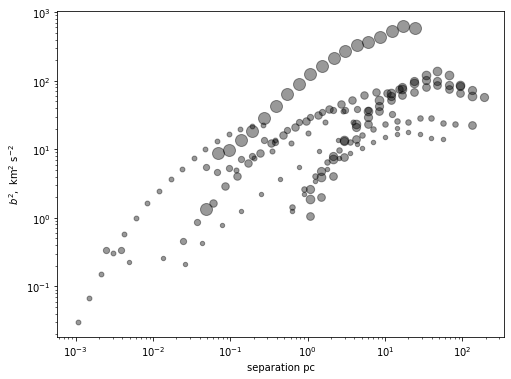

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))

for i in range(len(samples)):
    ax.errorbar(SF[samples[0][i]]['s'],SF[samples[0][i]]['b2'], fmt='o', alpha=0.4,color="black", markersize=5*np.log10(SF[samples[0][i]]['sig2']))

ax.set(xscale='log', yscale='log', 
       xlabel='separation pc',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

Orion

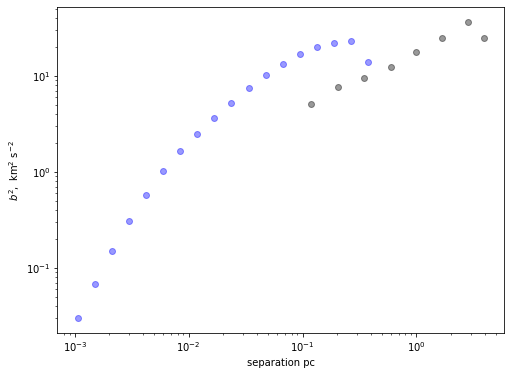

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(SF[samples[0][6]]['s'],SF[samples[0][6]]['b2'], fmt='o', alpha=0.4,color="black")
ax.errorbar(SF[samples[0][9]]['s'],SF[samples[0][9]]['b2'], fmt='o', alpha=0.4,color="blue")

ax.set(xscale='log', yscale='log', 
       xlabel='separation pc',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

In [9]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 3.533273696899414 seconds ---
